In [1]:
#Imports
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats as stats
from scipy.stats import skew
from scipy.stats import kurtosis

In [2]:
#Read Excel
billionaire_2023 = pd.read_excel(r'/content/Billionaires Statistics Dataset final.xlsx')

Modifications made manually to the data
- SelfMade - converted to a binary variable with values 1 for self made individual                                                      , 0 for individual with inherited wealth
- Gender - 1 for Male,0 for Female


In [7]:
billionaire_2023.head()

,rank,finalWorth,category,personName,age,country,city,source,industries,countryOfCitizenship,...,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
0,1,211000,Fashion & Retail,Bernard Arnault & family,74.0,France,Paris,LVMH,Fashion & Retail,France,...,1.1,2.715518e+12,65.6,102.5,82.5,24.2,60.7,67059887.0,46.227638,2.213749
1,2,180000,Automotive,Elon Musk,51.0,United States,Austin,"Tesla, SpaceX",Automotive,United States,...,7.5,2.142770e+13,88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
2,3,114000,Technology,Jeff Bezos,59.0,United States,Medina,Amazon,Technology,United States,...,7.5,2.142770e+13,88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
3,4,107000,Technology,Larry Ellison,78.0,United States,Lanai,Oracle,Technology,United States,...,7.5,2.142770e+13,88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891
4,5,106000,Finance & Investments,Warren Buffett,92.0,United States,Omaha,Berkshire Hathaway,Finance & Investments,United States,...,7.5,2.142770e+13,88.2,101.8,78.5,9.6,36.6,328239523.0,37.090240,-95.712891


In [105]:
billionaire_2023.describe()

,rank,finalWorth,age,selfMadeBinary,genderBinary,birthYear,birthMonth,birthDay,cpi_country,cpi_change_country,gdp_country,gross_tertiary_education_enrollment,gross_primary_education_enrollment_country,life_expectancy_country,tax_revenue_country_country,total_tax_rate_country,population_country,latitude_country,longitude_country
count,2640.000000,2640.000000,2575.000000,2640.000000,2640.000000,2564.000000,2564.000000,2564.000000,2456.000000,2456.000000,2.476000e+03,2458.000000,2459.000000,2458.000000,2457.000000,2458.000000,2.476000e+03,2476.000000,2476.000000
mean,1289.159091,4623.787879,65.140194,0.686364,0.872348,1957.183307,5.740250,12.099844,127.755204,4.364169,1.158287e+13,67.225671,102.858520,78.122823,12.546235,43.963344,5.102053e+08,34.903592,12.583156
std,739.693726,9834.240939,13.258098,0.464058,0.333765,13.282516,3.710085,9.918876,26.452951,3.623763,9.575588e+12,21.343426,4.710977,3.730099,5.368625,12.145296,5.542447e+08,17.003497,86.762989
min,1.000000,1000.000000,18.000000,0.000000,0.000000,1921.000000,1.000000,1.000000,99.550000,-1.900000,3.154058e+09,4.000000,84.700000,54.300000,0.100000,9.900000,3.801900e+04,-40.900557,-106.346771
25%,659.000000,1500.000000,56.000000,0.000000,1.000000,1948.000000,2.000000,1.000000,117.240000,1.700000,1.736426e+12,50.600000,100.200000,77.000000,9.600000,36.600000,6.683440e+07,35.861660,-95.712891
50%,1312.000000,2300.000000,65.000000,1.000000,1.000000,1957.000000,6.000000,11.000000,117.240000,2.900000,1.991000e+13,65.600000,101.800000,78.500000,9.600000,41.200000,3.282395e+08,37.090240,10.451526
75%,1905.000000,4200.000000,75.000000,1.000000,1.000000,1966.000000,9.000000,21.000000,125.080000,7.500000,2.142770e+13,88.200000,102.600000,80.900000,12.800000,59.100000,1.366418e+09,40.463667,104.195397
max,2540.000000,211000.000000,101.000000,1.000000,1.000000,2004.000000,12.000000,31.000000,288.570000,53.500000,2.142770e+13,136.600000,142.100000,84.200000,37.200000,106.300000,1.397715e+09,61.924110,174.885971


In [3]:
#Assign Variables

#Dependent Variable
finalWorth = billionaire_2023['finalWorth']

#Independent Variables
status_binary = billionaire_2023['selfMadeBinary']
gdp_country = billionaire_2023['gdp_country']
tertiary_education = billionaire_2023['gross_tertiary_education_enrollment']

#Hypothesis
status_Ha = 'There is a statistically significant difference in the net worth of self-made billionaires compared to those who inherited or acquired wealth through means other than self-made efforts'
gdp_country_Ha = 'There is a statistically significant positive relationship between a billionaire\'s net worth and the GDP of their country'
tertiary_education_Ha = 'There is a statistically significant positive correlation between a billionaire\'s net worth and the enrollement in tertiary education within their country'

#Additional Numeric & Binary Independent Variables
age = billionaire_2023['age']
gender_binary = billionaire_2023['genderBinary']
life_expectancy_country = billionaire_2023['life_expectancy_country']
total_tax_rate_country = billionaire_2023['total_tax_rate_country']
cpi_country = billionaire_2023['cpi_change_country']

#Additional Categorical Independent Variables
category = billionaire_2023['category']
country = billionaire_2023['country']
city = billionaire_2023['city']
industries = billionaire_2023['industries']
countryOfCitizenship = billionaire_2023['countryOfCitizenship']
title = billionaire_2023['title']
birthYear = billionaire_2023['birthYear']
status = billionaire_2023['status']
gender = billionaire_2023['gender']

iv_numeric = [status_binary, gdp_country, tertiary_education, age, gender_binary, life_expectancy_country, total_tax_rate_country, cpi_country]
iv_numeric_string = ['status_binary', 'gdp_country', 'tertiary_education', 'age', 'gender_binary', 'life_expectancy_country', 'total_tax_rate_country', 'cpi_country']

iv_nonnumeric = [category, country, city, industries, countryOfCitizenship, title, birthYear, status, gender]
iv_nonnumeric_string = ['category', 'country', 'city', 'industries', 'countryOfCitizenship', 'title', 'birthYear', 'status', 'gender']


In [5]:
len(finalWorth)

2640



# Variable Analysis

Examining Final Worth (Dependent Variable)

In [22]:
#Skewness for Final Worth

fw_skew = round(finalWorth.skew(),3)
if fw_skew > 0:
    fw_skew_interpret = 'Positive'
elif fw_skew < 0:
    fw_skew_interpret = 'Negative'
else:
    fw_skew_interpret = 'No Skew'
print(f'Skewness finalWorth: {fw_skew, fw_skew_interpret}')


Skewness finalWorth: (10.012, 'Positive')


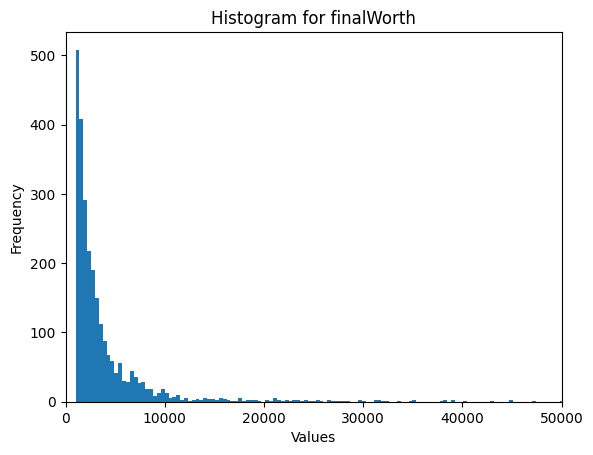

In [21]:
plt.hist(finalWorth, bins='auto')
plt.title(f'Histogram for finalWorth')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.xlim(0,50000)
plt.show()

<Axes: title={'center': 'Boxplot for FinalWorth'}>

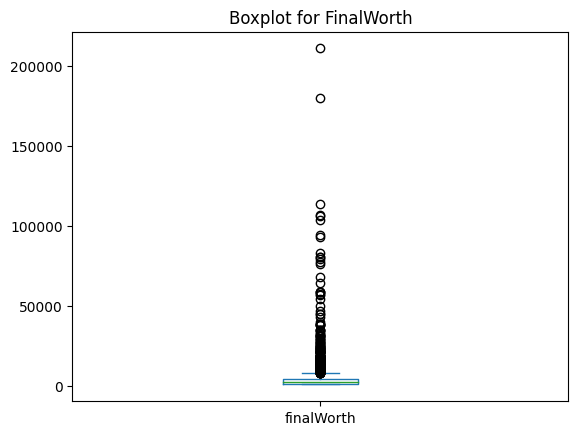

In [28]:
billionaire_2023['finalWorth'].plot(kind="box", title='Boxplot for FinalWorth')

Gender Analysis : describing basic statistics and comparing them for the two genders

In [88]:
men = []
women = []

for i in range(len(gender_binary)):
    if gender_binary[i] == 1:
        men.append(finalWorth[i])
    elif gender_binary[i] == 0:
        women.append(finalWorth[i])

# Creating DataFrames
men_df = pd.DataFrame({'Men_Wealth': men})
women_df = pd.DataFrame({'Women_Wealth': women})

In [89]:
pd.concat([men_df.describe(), women_df.describe()], axis=1)

,Men_Wealth,Women_Wealth
count,2303.000000,337.000000
mean,4631.610942,4570.326409
std,10119.861563,7612.478646
min,1000.000000,1000.000000
25%,1500.000000,1500.000000
50%,2300.000000,2500.000000
75%,4200.000000,4800.000000
max,211000.000000,80500.000000


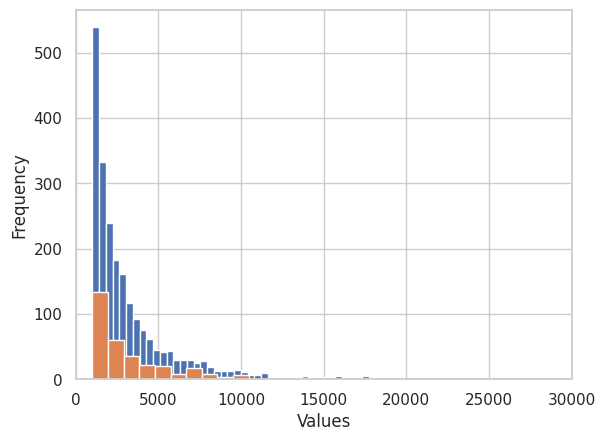

In [90]:
plt.hist(men_df, bins='auto')
plt.hist(women_df, bins='auto')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.xlim(0,30000)
plt.show()

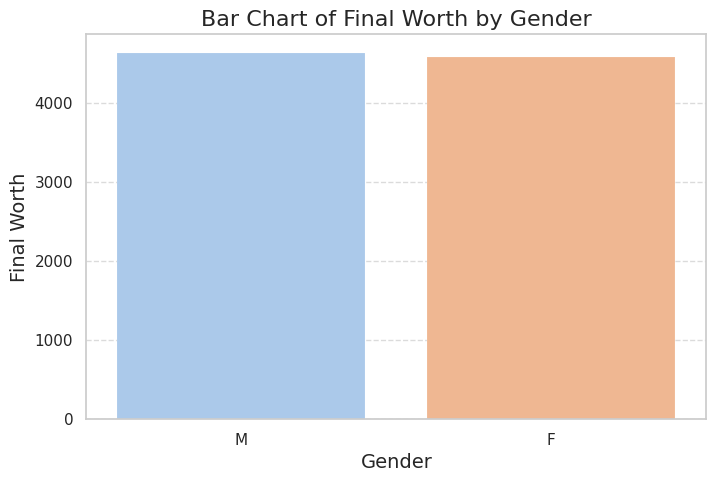

In [91]:

# Set a custom color palette
colors = sns.color_palette("pastel")
sns.set(style="whitegrid")
# Create a bar chart
plt.figure(figsize=(8,5))
sns.barplot(x='gender', y='finalWorth', data=billionaire_2023,palette=colors, linewidth=0.1, errorbar=None)

# Add labels and title with increased font size
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Final Worth', fontsize=14)
plt.title('Bar Chart of Final Worth by Gender', fontsize=16)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)
#plt.legend(title='Gender', labels=['Male', 'Female'])

Self Made V/S Inherited Individuals

In [39]:
self_made = []
non_self_made = []

for i in range(len(status_binary)):
    if status_binary[i] == 1:
        self_made.append(finalWorth[i])
    elif status_binary[i] == 0:
        non_self_made.append(finalWorth[i])

# Creating DataFrames
self_made_df = pd.DataFrame({'selfmade_Wealth': self_made})
non_self_made_df = pd.DataFrame({'non_selfmade_Wealth': non_self_made})

In [40]:
pd.concat([self_made_df.describe(), non_self_made_df.describe()], axis=1)

,selfmade_Wealth,non_selfmade_Wealth
count,1812.000000,828.000000
mean,4465.397351,4970.410628
std,9455.299246,10614.182811
min,1000.000000,1000.000000
25%,1500.000000,1600.000000
50%,2200.000000,2600.000000
75%,4100.000000,4625.000000
max,180000.000000,211000.000000


<Axes: xlabel='selfMade', ylabel='finalWorth'>

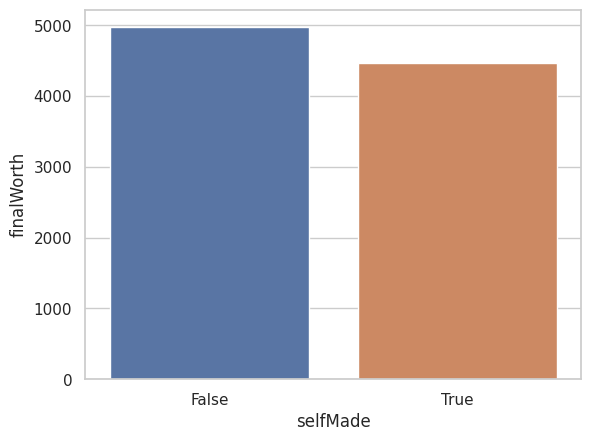

In [96]:
sns.barplot(x='selfMade', y='finalWorth', data=billionaire_2023, errorbar=None)

<Axes: >

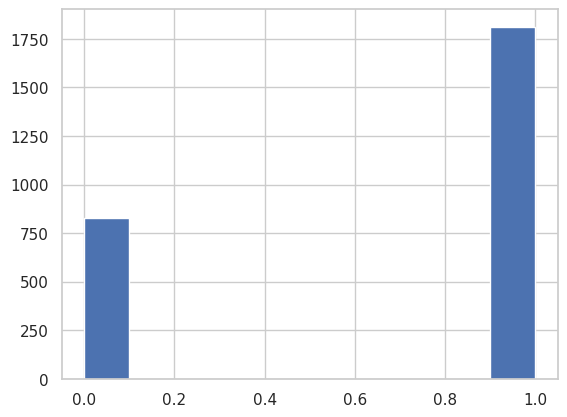

In [103]:
billionaire_2023['selfMadeBinary'].hist()

Correlation Matrix between all the variables

<ipython-input-104-07168b3091d4>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ]].corr()


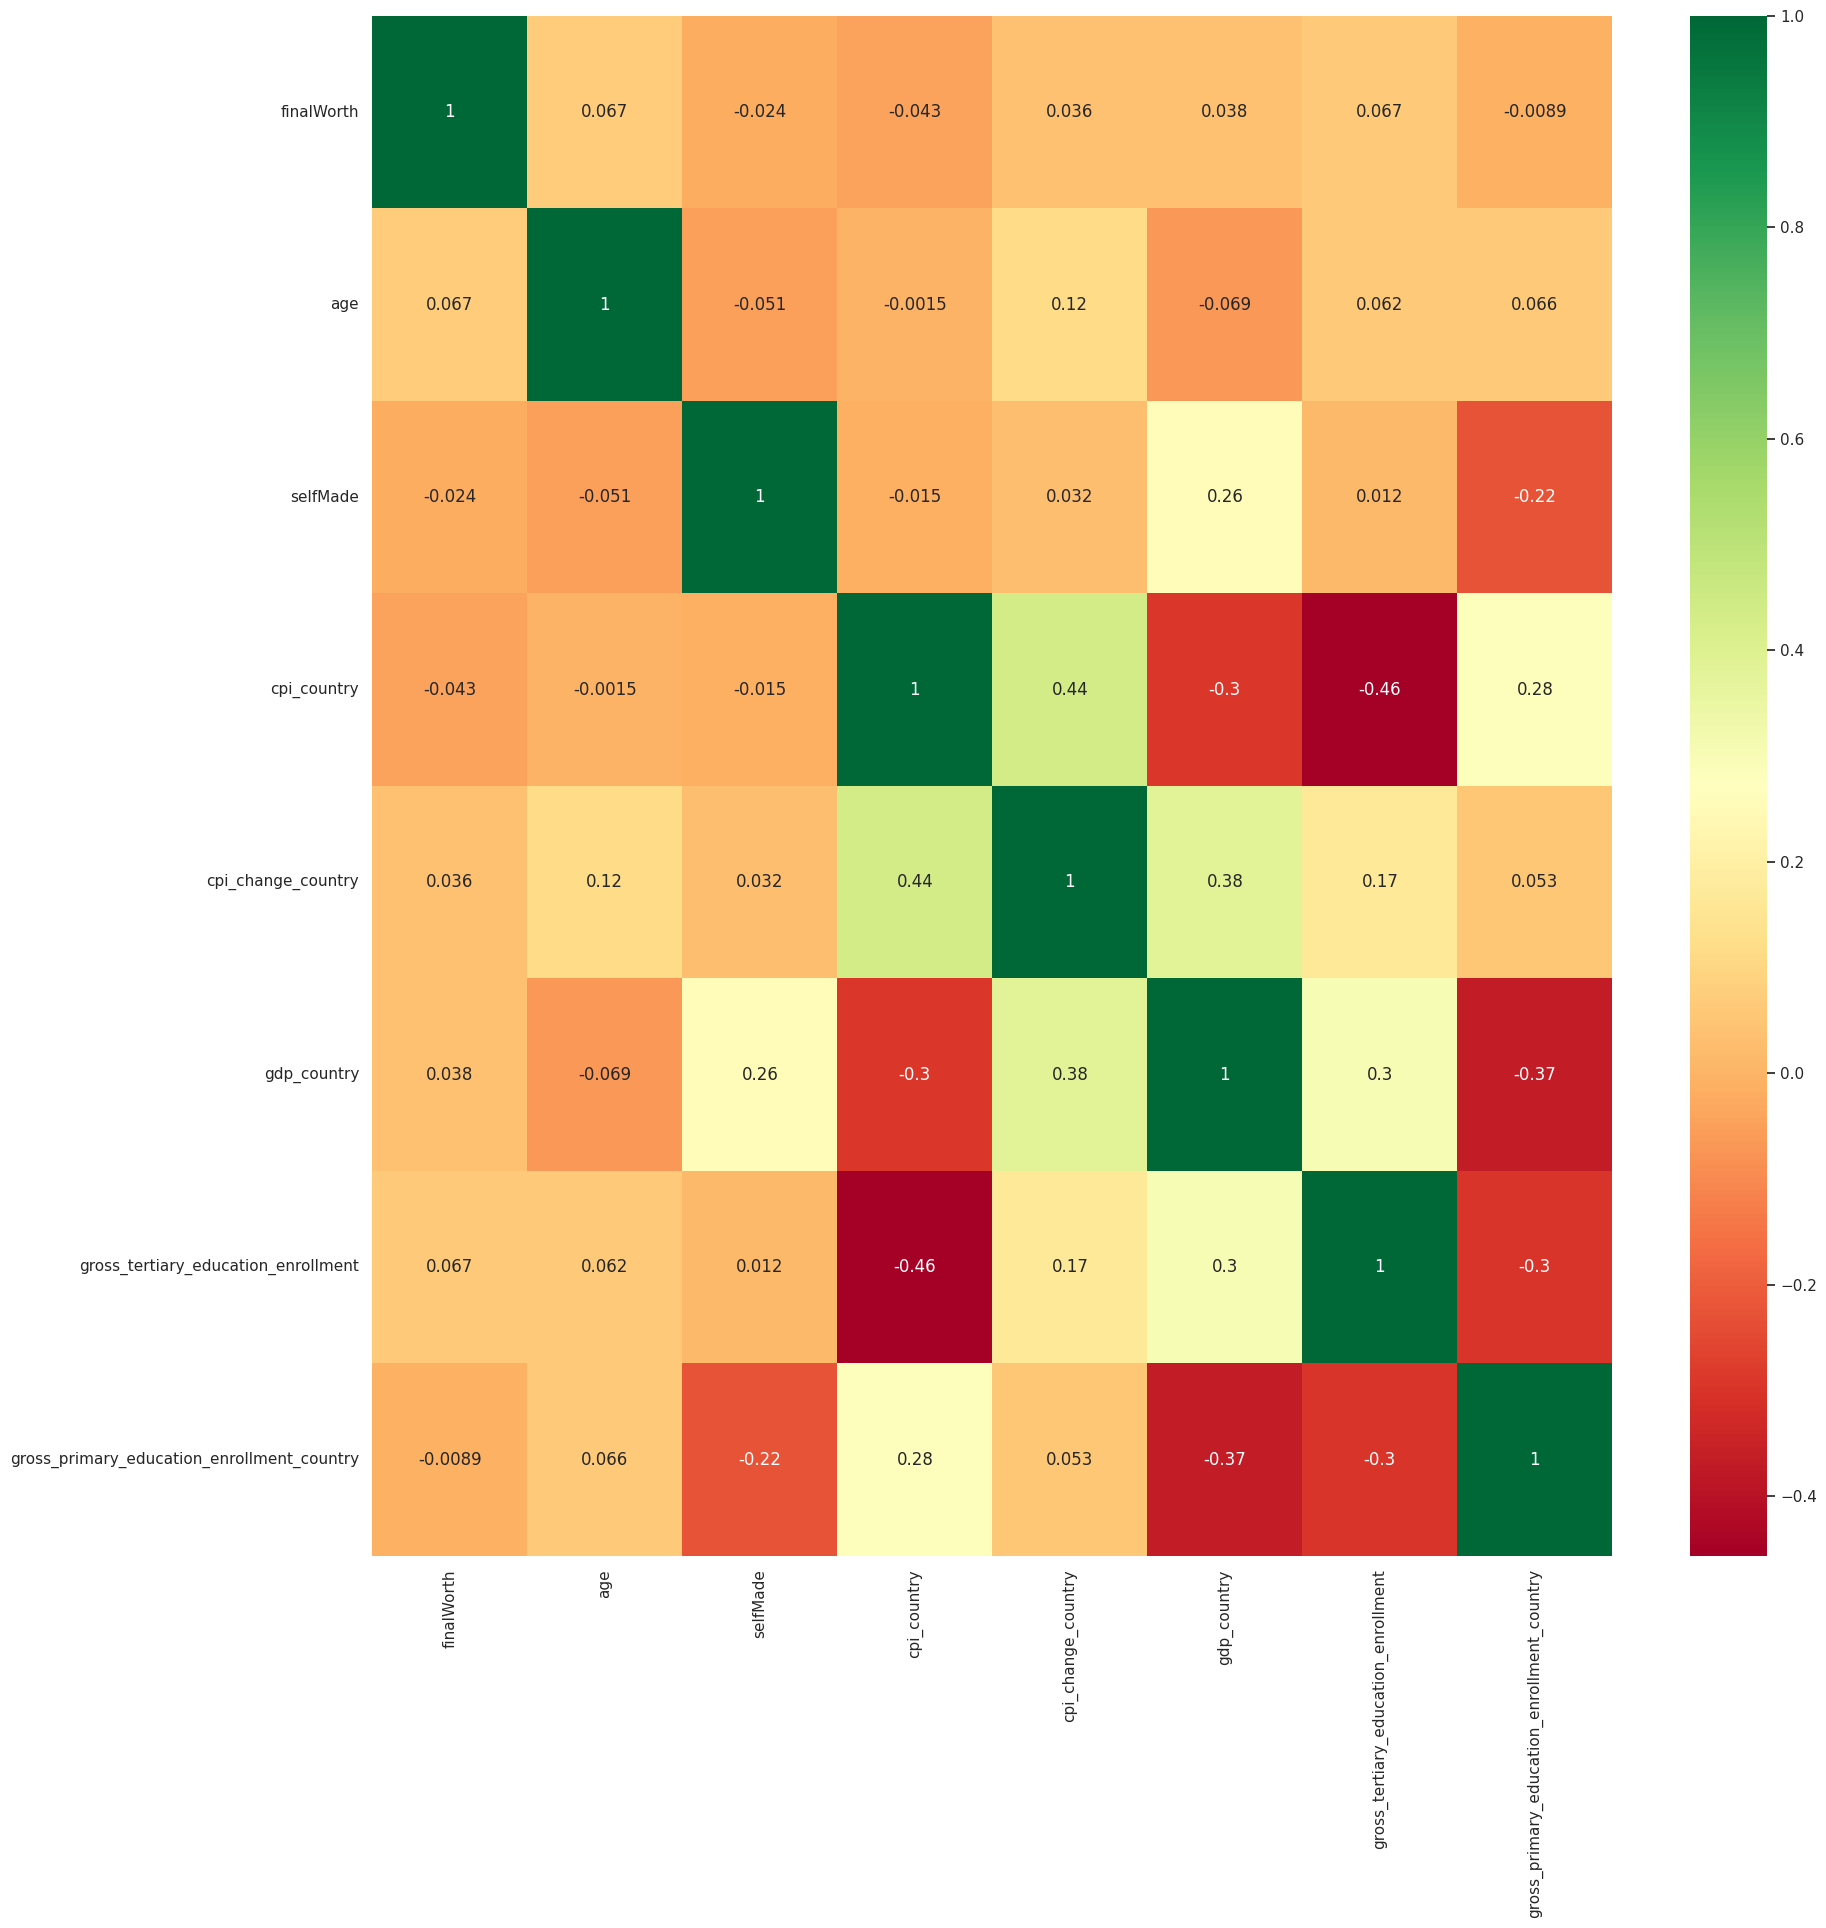

In [104]:
corr = billionaire_2023[['finalWorth','category','age',	'country',	'city',	'source',	'industries',	'countryOfCitizenship',	'selfMade',		'status',	'gender',	'cpi_country',	'cpi_change_country',	'gdp_country',	'gross_tertiary_education_enrollment',	'gross_primary_education_enrollment_country'
]].corr()
#removed : rank, birth year month date, personname, organization, first last name, title, birtydate, date, state, residentStateRegion
plt.figure(figsize=(20, 20))
sns.heatmap(corr, annot=True, cmap="RdYlGn")
plt.show()

T-test between final worth for self made and inherited wealth individuals

In [107]:
from scipy.stats import ttest_ind
self_made = billionaire_2023[billionaire_2023['selfMadeBinary']==1]
non_self_made =  billionaire_2023[billionaire_2023['selfMadeBinary']==0]

In [108]:
t_statistic, p_value = ttest_ind(self_made['finalWorth'], non_self_made['finalWorth'])
# Display results
print(f'T-statistic: {t_statistic}')
print(f'P-value: {p_value}')

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in net worth between self-made and non self-made billionaires.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in net worth between self-made and non self-made billionaires.")

T-statistic: -1.224321020574619
P-value: 0.22094047546811948
Fail to reject the null hypothesis. There is no significant difference in net worth between self-made and non self-made billionaires.


# Regression Analysis

**Simple Linear Regression**

In [112]:
#Simple Linear Regression between self made and final worth
import statsmodels.api as sm

# Define independent variables (X) and dependent variable (Y)
#X = billionaire_2023['selfMade']

billionaire_2023 = pd.get_dummies(billionaire_2023, columns=['selfMade'], drop_first=True)
X = billionaire_2023['selfMade_True']
Y = billionaire_2023['finalWorth']

# Add a constant term for the intercept
X = sm.add_constant(X)

# Fit the regression model
model = sm.OLS(Y, X.astype(float)).fit()

# Print regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             finalWorth   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     1.499
Date:                Sun, 10 Dec 2023   Prob (F-statistic):              0.221
Time:                        06:39:01   Log-Likelihood:                -28016.
No. Observations:                2640   AIC:                         5.604e+04
Df Residuals:                    2638   BIC:                         5.605e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4970.4106    341.731     14.545

**Simple Linear Regression after Log Transformation**

In [113]:
#Linear regression after applying logarithmic transformation

import statsmodels.api as sm
from math import log

# Logarithmic transformation of 'FinalWorth'
billionaire_2023['logfinalWorth'] = billionaire_2023['finalWorth'].apply(lambda x: 0 if x == 0 else log(x))

# Add a constant term to the independent variables matrix
#billionaire_2023 = pd.get_dummies(billionaire_2023, columns=['selfMade'], drop_first=True)
X = sm.add_constant(billionaire_2023[['selfMade_True']])

# Fit the linear regression model
model = sm.OLS(billionaire_2023['logfinalWorth'], X.astype(float)).fit()

# Print the regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          logfinalWorth   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     8.045
Date:                Sun, 10 Dec 2023   Prob (F-statistic):            0.00460
Time:                        06:39:55   Log-Likelihood:                -3220.4
No. Observations:                2640   AIC:                             6445.
Df Residuals:                    2638   BIC:                             6457.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             7.9974      0.028    280.712

Here, the result is statistically significant for Self Made variable

**Multiple Regression** - adding total_tax_rate_country and gender to the above regression

In [115]:
billionaire_2023.isna().sum()

rank                                             0
finalWorth                                       0
category                                         0
personName                                       0
age                                             65
country                                         38
city                                            72
source                                           0
industries                                       0
countryOfCitizenship                             0
organization                                  2315
selfMadeBinary                                   0
status                                           0
gender                                           0
genderBinary                                     0
birthDate                                       76
lastName                                         0
firstName                                        3
title                                         2301
date                           

Before we proceed with the multiple regression, we need to drop the nulls for 'total_tax_rate_country' and 'gender'. However, for gender all rows are populated.

In [116]:
billionaire_2023 = billionaire_2023.dropna(subset=['total_tax_rate_country'])

In [118]:
#Multiple Regression against log(finalworth)
# Convert categorical variables to dummy/indicator variables
billionaire_2023 = pd.get_dummies(billionaire_2023, columns=['gender'], drop_first=True)

# Add a constant term to the independent variables matrix

X= billionaire_2023[['selfMade_True', 'gender_M', 'total_tax_rate_country']]

X = sm.add_constant(X)
Y = billionaire_2023['logfinalWorth']

# Fit the multiple regression model
model = sm.OLS(Y, X).fit()

# Print the regression summary
print(model.summary())



                            OLS Regression Results                            
Dep. Variable:          logfinalWorth   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     11.87
Date:                Sun, 10 Dec 2023   Prob (F-statistic):           1.02e-07
Time:                        06:48:15   Log-Likelihood:                -3004.5
No. Observations:                2458   AIC:                             6017.
Df Residuals:                    2454   BIC:                             6040.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      8

Here, P-value for gender is quite significant, so we can try to remove it from the regression and re-run it.

In [119]:
#Multiple Regression after removing gender ; against logFinal

# Add a constant term to the independent variables matrix

X= billionaire_2023[['selfMade_True', 'total_tax_rate_country']]

X = sm.add_constant(X)
Y = billionaire_2023['logfinalWorth']

# Fit the multiple regression model
model = sm.OLS(Y, X).fit()

# Print the regression summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:          logfinalWorth   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     17.80
Date:                Sun, 10 Dec 2023   Prob (F-statistic):           2.12e-08
Time:                        06:54:02   Log-Likelihood:                -3004.5
No. Observations:                2458   AIC:                             6015.
Df Residuals:                    2455   BIC:                             6032.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      8

This p-value of 0.005 is less than the threshold value of 0.05 so this relationship is significant.

Next, explored the relationship of gender with self made status, by including an interaction term. This is to explore if both genders have different relationships between self made variable and with finalworth value.

In [120]:
#Interaction term for Gender

billionaire_2023['gender_selfMade_interaction'] = billionaire_2023['gender_M'] * billionaire_2023['selfMade_True']
#Multiple Regression
# Convert categorical variables to dummy/indicator variables
#billionaire_2023 = pd.get_dummies(billionaire_2023, columns=['gender'], drop_first=True)

# Add a constant term to the independent variables matrix

X= billionaire_2023[['selfMade_True', 'gender_M', 'gender_selfMade_interaction']]

X = sm.add_constant(X)
Y = billionaire_2023['logfinalWorth']

# Fit the multiple regression model
model = sm.OLS(Y, X).fit()


# Print the regression summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          logfinalWorth   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     5.838
Date:                Sun, 10 Dec 2023   Prob (F-statistic):           0.000569
Time:                        07:00:19   Log-Likelihood:                -3013.5
No. Observations:                2458   AIC:                             6035.
Df Residuals:                    2454   BIC:                             6058.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

The p value for the interaction term is significant as 0.014 < 0.050 but the p-value for gender alone is not. (0.163>0.05)